# Health Insurance Cross Sell Prediction
## Project Description
### => Predict Health Insurance Owners' who will be interested in Vehicle Insurance.A client is an Insurance company that has provided Health Insurance to its customers and they need to build a model that wiil be able to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.
### =>An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
### =>Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle,the insurance provider company will provide a compensation (called ‘sum assured’) to the customer
### =>Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc
## Machine Learning Project Lifecycle
### 1.Importing Libraries
### 2. Data collection(static)
### 3.Data  preparation
### 4.Exploratory Data Analysis
### 5.Feature selection and Feature engineering
### 6.Model selection and training
### 7.Model evaluation
### 8.Deployment

### Importing libraries

In [1]:
import xgboost
print(xgboost.__version__)

2.0.1


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### data loading

In [2]:
df = pd.read_csv('vehicleInsurance.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
#overall information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [4]:
df.duplicated().sum()

0

In [5]:
#statistical summary of the data
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.drop('id',axis=1,inplace=True)
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['gender', 'age', 'driving_license', 'region_code', 'previously_insured',
       'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [8]:
df.gender.value_counts()

gender
Male      206089
Female    175020
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

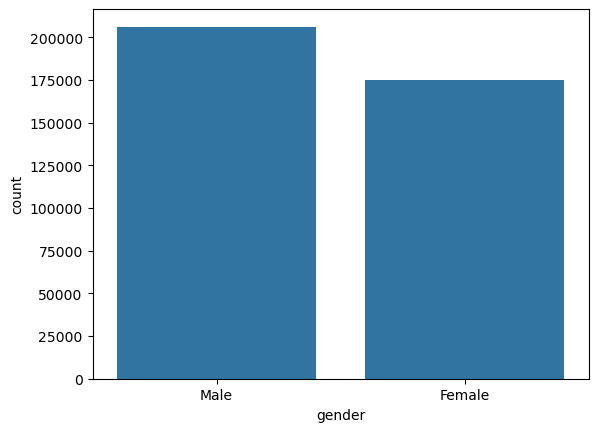

In [9]:
#there are more males than females
sns.countplot(x=df.gender)

In [10]:
print(f"Maximum age is: {df.age.max()}")
print('')
print(f"Minimum age is: {df.age.min()}")

Maximum age is: 85

Minimum age is: 20


<Axes: xlabel='age', ylabel='Count'>

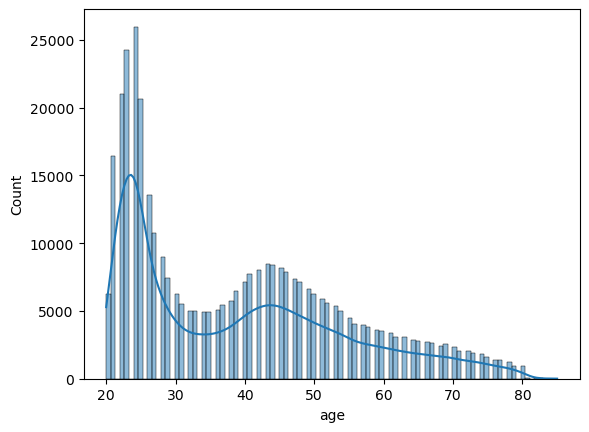

In [11]:
#most of the individuals who apply for the insurance are between age 20 and 30
sns.histplot(df.age, kde=True)

<Axes: xlabel='age', ylabel='Count'>

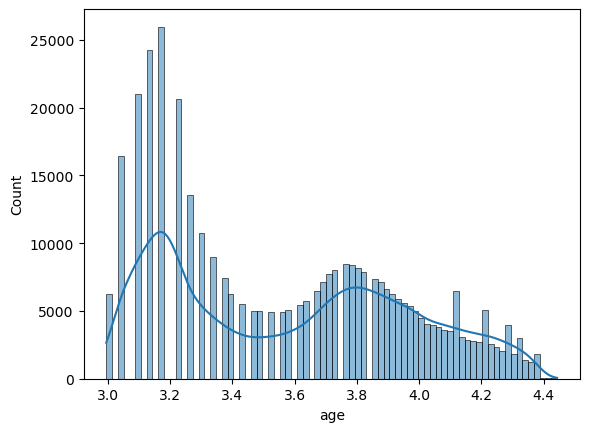

In [12]:
sns.histplot(np.log(df.age), kde=True)

In [13]:
df.driving_license.value_counts()

driving_license
1    380297
0       812
Name: count, dtype: int64

<Axes: xlabel='driving_license', ylabel='count'>

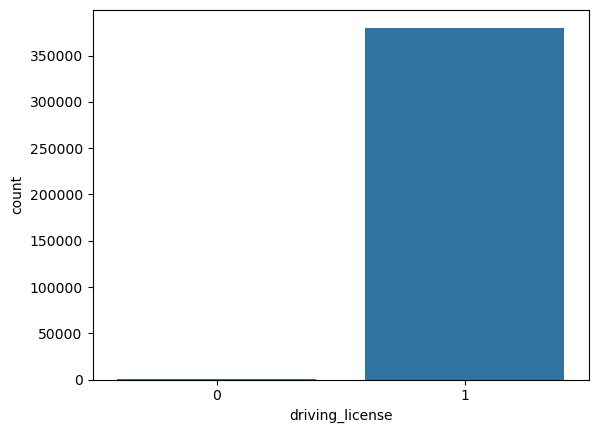

In [14]:
#most individuals do not have driving lincence
sns.countplot(x=df.driving_license)

### Previously_Insured	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

In [15]:
df.previously_insured.value_counts()

previously_insured
0    206481
1    174628
Name: count, dtype: int64

<Axes: xlabel='previously_insured', ylabel='count'>

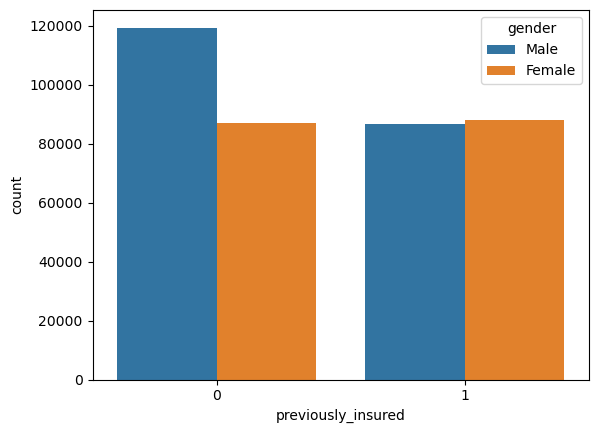

In [16]:
sns.countplot(x=df.previously_insured, hue=df.gender)

In [17]:
df.vehicle_age.value_counts()

vehicle_age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

<Axes: xlabel='vehicle_age', ylabel='count'>

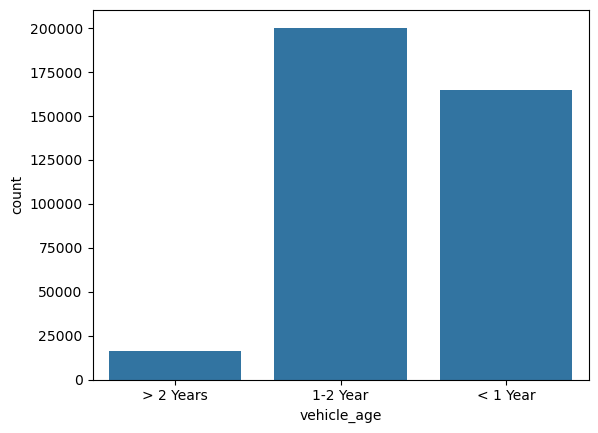

In [18]:
sns.countplot(x=df.vehicle_age)

<Axes: xlabel='region_code', ylabel='Count'>

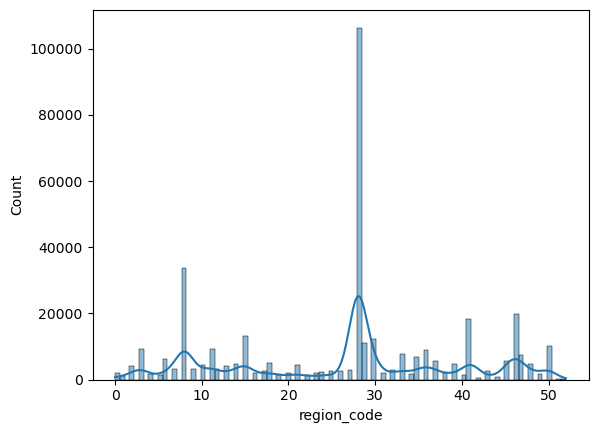

In [19]:
sns.histplot(df.region_code,kde=True)

### Vehicle_Damage	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

In [20]:
df.vehicle_damage.value_counts()

vehicle_damage
Yes    192413
No     188696
Name: count, dtype: int64

<Axes: xlabel='vehicle_damage', ylabel='count'>

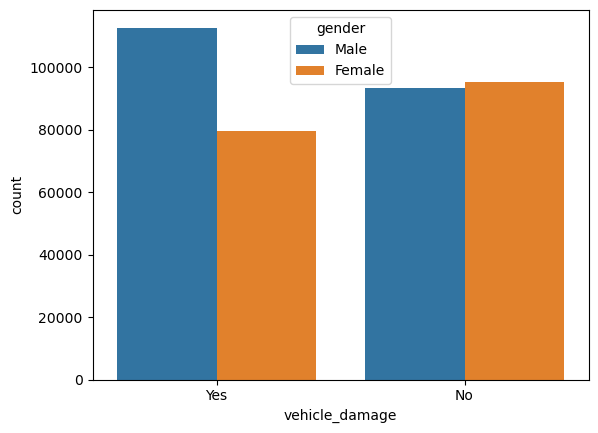

In [21]:
#most males damaged their vehicle previously
sns.countplot(x=df.vehicle_damage,hue=df.gender)

<Axes: xlabel='annual_premium', ylabel='Count'>

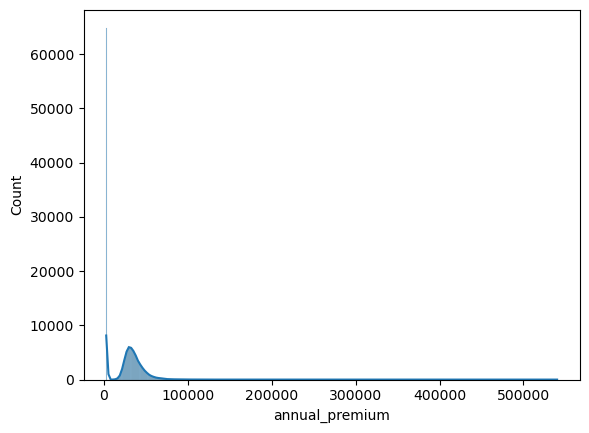

In [22]:
#most individuals have an annual_premium of between 0 and 100000
sns.histplot(df.annual_premium, kde=True)

<Axes: xlabel='annual_premium', ylabel='Count'>

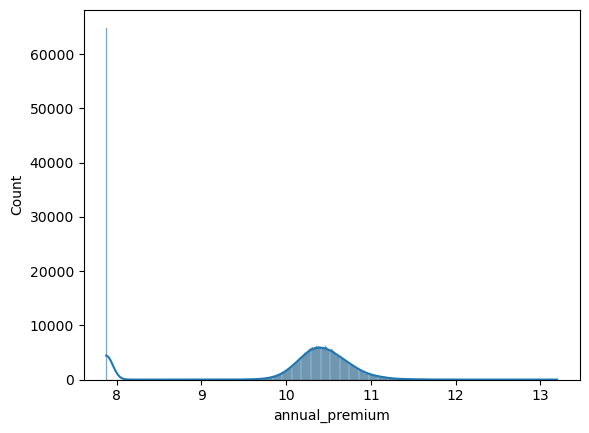

In [23]:
sns.histplot(np.log(df.annual_premium), kde=True)

### Transforming the 'annual_premium' column in order to make it Normal

In [24]:
df['log_annual_premium'] = np.log(df.annual_premium)

In [25]:
print(f"The maximum amount customer needs to pay as premium in the year is: {df.annual_premium.max()}")
print(f"The minimum amount customer needs to pay as premium in the year is: {df.annual_premium.min()}")

The maximum amount customer needs to pay as premium in the year is: 540165.0
The minimum amount customer needs to pay as premium in the year is: 2630.0


### Policy_Sales_Channel	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

### Vintage:Number of Days, Customer has been associated with the company

In [26]:
print(f"Maximum number of Days, Customer has been associated with the company is: {df.vintage.max()}")
print(f"Minimum number of Days, Customer has been associated with the company is: {df.vintage.min()}")

Maximum number of Days, Customer has been associated with the company is: 299
Minimum number of Days, Customer has been associated with the company is: 10


<Axes: xlabel='vintage', ylabel='Count'>

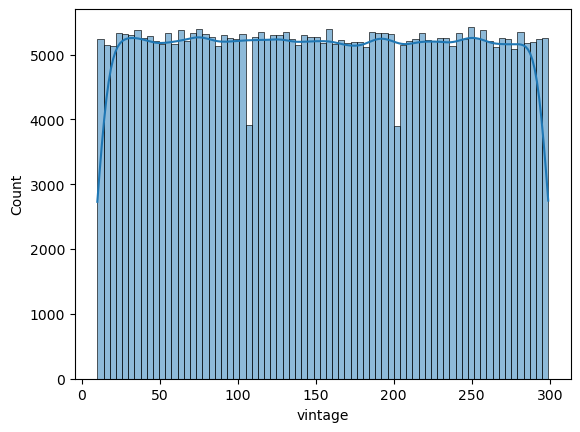

In [27]:
sns.histplot(x=df.vintage,kde=True)

<Axes: xlabel='policy_sales_channel', ylabel='Count'>

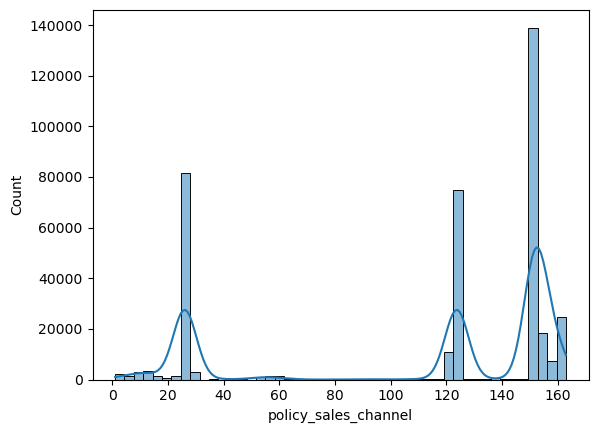

In [28]:
sns.histplot(x=df.policy_sales_channel,kde=True)


In [29]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,log_annual_premium
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,10.607921
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,10.420375
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,10.553049
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,10.261826
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,10.221796


In [30]:
df.response.value_counts()

response
0    334399
1     46710
Name: count, dtype: int64

### We can see that our target column is likely to be imbalanced

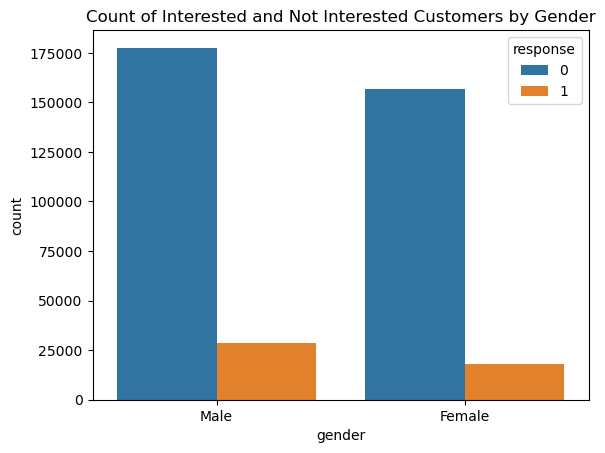

In [31]:
sns.countplot(x='gender', hue='response', data=df)
plt.title('Count of Interested and Not Interested Customers by Gender')
plt.show()

In [32]:
df.shape

(381109, 12)

In [33]:
df.drop('annual_premium',axis=1,inplace=True)
df = df[['gender','age','driving_license','region_code','previously_insured','vehicle_age','vehicle_damage','log_annual_premium','policy_sales_channel','vintage','response']]
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,log_annual_premium,policy_sales_channel,vintage,response
0,Male,44,1,28.0,0,> 2 Years,Yes,10.607921,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,10.420375,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,10.553049,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,10.261826,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,10.221796,152.0,39,0


### Let's get rid of outliers

In [34]:
columns_for_outliers = ['age','region_code','log_annual_premium','policy_sales_channel','vintage']
for col in columns_for_outliers:
    upper_bound = df[col].mean() + (2*df[col].std())
    lower_bound = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

In [35]:
df.shape

(299403, 11)

In [36]:
df.driving_license.value_counts()

driving_license
1    299013
0       390
Name: count, dtype: int64

<Axes: xlabel='vehicle_age', ylabel='count'>

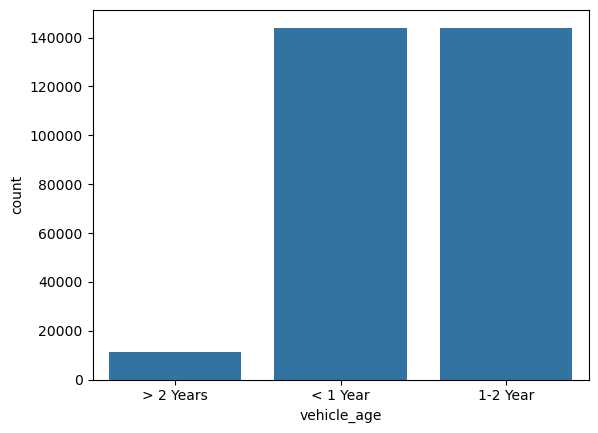

In [37]:
sns.countplot(x=df.vehicle_age)

### Mapping categorical columns to numerical values

In [38]:
df.gender = df.gender.map({'Female':0,'Male':1})
df.vehicle_age = df.vehicle_age.map({'> 2 Years':0,'< 1 Year':1,'1-2 Year':2})
df.vehicle_damage = df.vehicle_damage.map({'No':0,'Yes':1})

In [39]:
df.head()

,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,log_annual_premium,policy_sales_channel,vintage,response
0,1,44,1,28.0,0,0,1,10.607921,26.0,217,1
2,1,47,1,28.0,0,0,1,10.553049,26.0,27,1
3,1,21,1,11.0,1,1,0,10.261826,152.0,203,0
4,0,29,1,41.0,1,1,0,10.221796,152.0,39,0
6,1,23,1,11.0,0,1,1,10.059080,152.0,249,0


### Undersampling the data

In [40]:
class_count_0,class_count_1 = df['response'].value_counts()
class_0 = df[df['response']==0]
class_1 = df[df['response']==1]
print(f'Shape of class 0 before sampling is: {class_0.shape}')
print(f'Shape of class 1 before sampling is: {class_1.shape}')
class_0_under = class_0.sample(class_count_1)
df = pd.concat([class_0_under,class_1],axis=0)
print(f'Shape of class 0 after sampling is: {class_0_under.shape}')
print(f'Shape of class 1 after sampling is: {class_1.shape}')

Shape of class 0 before sampling is: (262726, 11)
Shape of class 1 before sampling is: (36677, 11)
Shape of class 0 after sampling is: (36677, 11)
Shape of class 1 after sampling is: (36677, 11)


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

### Creating dependent and independent variable

In [42]:
X = df.drop('response',axis=1)
y = df.response
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Performing feature selection on different models

In [43]:
model = LogisticRegression(max_iter=250)
rfe = RFE(model)
values = rfe.fit(X,y)
print(f"Selected features: {values.support_}")

C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\odhia\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

Selected features: [ True False  True False  True  True  True False False False]


In [44]:
X_log = X.drop(['age','region_code','log_annual_premium','policy_sales_channel','vintage'],axis=1)

In [45]:
from sklearn.preprocessing import MinMaxScaler
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_test_log = scaler.transform(X_test_log)

In [46]:
model.fit(X_train_log,y_train_log)
pred = model.predict(X_test_log)
print(accuracy_score(y_test_log,pred))

0.7990075794754349


### Decision Tree

In [47]:
tree = DecisionTreeClassifier()
rfe2 = RFE(tree)
values2 = rfe2.fit(X,y)
print(f"Selected features: {values2.support_}")

Selected features: [False  True False  True False False  True  True False  True]


In [48]:
X_tree = X.drop(['gender','driving_license','previously_insured','vehicle_age','policy_sales_channel'],axis=1)
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, test_size=0.25, random_state=42)
X_train_tree = scaler.fit_transform(X_train_tree)
X_test_tree = scaler.transform(X_test_tree)

In [49]:
tree.fit(X_train_tree,y_train_tree)
prediction = tree.predict(X_test_tree)
print(accuracy_score(y_test_tree,prediction))

0.7129614482796227


### Random Forest

In [50]:
forest = RandomForestClassifier()
rfe3 = RFE(forest)
values3 = rfe3.fit(X,y)
print(f"Selected features: {values3.support_}")

Selected features: [False  True False False  True False  True  True False  True]


In [51]:
X_forest = X.drop(['gender','driving_license','region_code','vehicle_age','policy_sales_channel'],axis=1)
X_train_forest, X_test_forest, y_train_forest, y_test_forest = train_test_split(X_forest, y, test_size=0.25, random_state=42)
X_train_forest = scaler.fit_transform(X_train_forest)
X_test_forest = scaler.transform(X_test_forest)

In [52]:
forest.fit(X_train_forest,y_train_forest)
y_pred = forest.predict(X_test_forest)
print(accuracy_score(y_test_forest,y_pred))

0.7770870821746005


### XGB

In [53]:
xgb = XGBClassifier()
rfe4 = RFE(xgb)
values4 = rfe4.fit(X,y)
print(f"Selected features: {values4.support_}")

Selected features: [False  True False False  True  True  True False  True False]


In [54]:
X_xgb = X.drop(['gender','driving_license','region_code','log_annual_premium','vintage'],axis=1)
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y, test_size=0.25, random_state=42)
X_train_xgb = scaler.fit_transform(X_train_xgb)
X_test_xgb = scaler.transform(X_test_xgb)

xgb.fit(X_train_xgb,y_train_xgb)
y_prediction = xgb.predict(X_test_xgb)
print(accuracy_score(y_test_xgb,y_prediction))

0.8104040569278587


### From the above,XGB has the best accuarcy with features ['age','previously_insured','vehicle_age','vehicle_damage','policy_sales_channel']

### saving objects

In [55]:
import pickle
data = {'model':xgb,'scaler':scaler}
with open('vehicle.pkl','wb') as file:
    pickle.dump(data,file)